In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('real_estate_price_size.csv')

Define the axis (figuring out dependent and independent axix)
Dependent = price
Independent = size

In [3]:
x = df['size']
y = df['price']

Calculate coefficients using LSM (Least Squared Method)

Line of Best Fit -> y = beta0 + beta1*x

beta1 = (N * sum(x * y) - (sum(x) * sum(y))) / N * sum(x)^2 - (sum(x))^2

beta0 = (sum(y)^2 - beta1 * sum(x)) / N

In [4]:
N = len(x)
sum_x = np.sum(x)
sum_y = np.sum(y)
sum_xy = np.sum(x*y)
sum_x_squared = np.sum(x**2)

beta1 = round((N * sum_xy - (sum_x * sum_y))/(N * sum_x_squared - (sum_x ** 2)),2)

beta0 = round((sum_y - (beta1 * sum_x))/ N,2)

print(f'Intercept: {beta0}' )
print(f'Coefficient: {beta1}')

Intercept: 101911.53
Coefficient: 223.18


Calculating the Predictions

In [5]:
def predict_price(size):
    return beta0 + beta1 * size

size = 650
print(predict_price(size))

246978.53


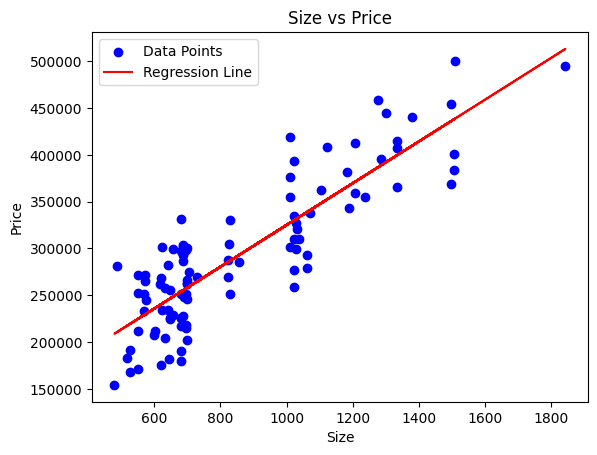

In [6]:
plt.scatter(x, y, color='blue', label='Data Points')
regression_line = beta0 + beta1 * x

plt.plot(x, regression_line, color='red', label='Regression Line')

plt.xlabel('Size')
plt.ylabel('Price')
plt.title('Size vs Price')
plt.legend()
plt.show()

Code Enhancements

Residual Plots -> Difference between actual and predicted

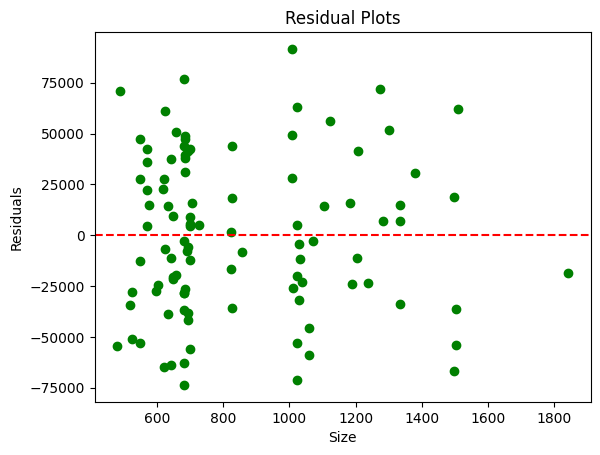

In [7]:
df = beta0 + beta1 * x
df['residuals'] = y - df

plt.scatter(x, df['residuals'], color='green')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Size')
plt.ylabel('Residuals')
plt.title('Residual Plots')
plt.show()

Confidence Intervals

In [8]:
from scipy import stats

        price     size
0  234314.144   643.09
1  228581.528   656.22
2  281626.336   487.29
3  401255.608  1504.75
4  458674.256  1275.46
Intercept: 101912.60180122864
Coefficient: 223.17874259460794
Predicted Price for size 650: 246978.78448772378


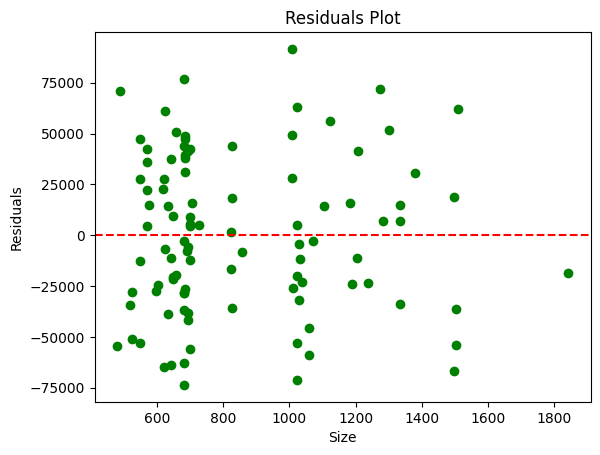

R-squared: 0.7447391865847586


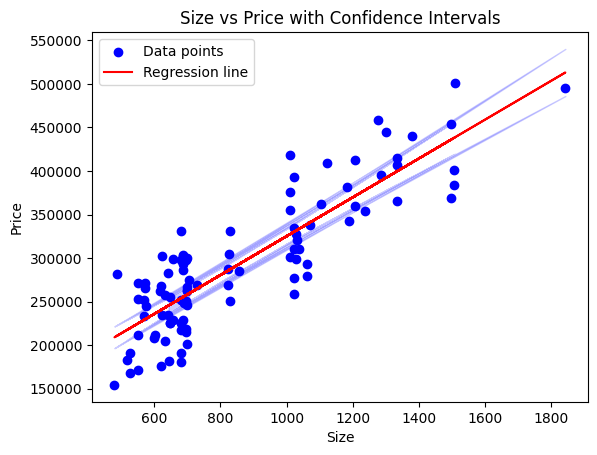

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Step 1: Load Data
data = pd.read_csv('/Users/ronitguptaaa/Documents/Excel Analysis/LinearRegressionAnalysis/real_estate_price_size.csv')

# Step 2: Display DataFrame
print(data.head())

# Step 3: Prepare the Data
X = data['size']
y = data['price']

# Step 4: Calculate the Coefficients
N = len(X)
sum_x = np.sum(X)
sum_y = np.sum(y)
sum_xy = np.sum(X * y)
sum_x_squared = np.sum(X ** 2)

# Calculating the slope (β1)
beta_1 = (N * sum_xy - sum_x * sum_y) / (N * sum_x_squared - sum_x ** 2)

# Calculating the intercept (β0)
beta_0 = (sum_y - beta_1 * sum_x) / N

print(f'Intercept: {beta_0}')
print(f'Coefficient: {beta_1}')

# Step 5: Make Predictions
def predict(size):
    return beta_0 + beta_1 * size

# Predict the price for a new size value
new_size = 650
predicted_price = predict(new_size)

print(f'Predicted Price for size 650: {predicted_price}')

# Calculate residuals
data['predicted_price'] = beta_0 + beta_1 * data['size']
data['residuals'] = data['price'] - data['predicted_price']

# Plot residuals
plt.scatter(data['size'], data['residuals'], color='green')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Size')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()

# R-squared calculation
ss_total = np.sum((y - np.mean(y)) ** 2)
ss_residuals = np.sum((y - data['predicted_price']) ** 2)
r_squared = 1 - (ss_residuals / ss_total)

print(f'R-squared: {r_squared}')

# Function to get prediction intervals
def get_prediction_intervals(x, y, x_pred, confidence=0.95):
    n = len(x)
    mean_x = np.mean(x)
    t_value = stats.t.ppf((1 + confidence) / 2., n-2)
    s_err = np.sum(np.power(y - (beta_0 + beta_1 * x), 2))
    conf = t_value * np.sqrt((s_err / (n-2)) * (1.0/n + (np.power((x_pred - mean_x), 2) / ((np.sum(np.power(x, 2))) - n * (np.power(mean_x, 2))))))

    return conf

# Predict values and intervals
predicted_prices = predict(X)
conf_intervals = get_prediction_intervals(X, y, X)

# Plot with confidence intervals
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, predicted_prices, color='red', label='Regression line')
plt.fill_between(X, predicted_prices - conf_intervals, predicted_prices + conf_intervals, color='b', alpha=0.2)
plt.xlabel('Size')
plt.ylabel('Price')
plt.title('Size vs Price with Confidence Intervals')
plt.legend()
plt.show()
